# 01 Insights & Functions

#### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#### Read in Data from 00

In [2]:
data = pd.read_csv('Data/data_combined_clean')
data.drop(columns='Unnamed: 0', inplace=True)

In [3]:
data

,name,country,ticket_price,avg_rating,genre
0,DP8KXXHzBv,Genosha,85.2207,7.2537,SwordSmithing
1,xk8b9MocTE,Genosha,176.2547,62.8047,SwordSmithing
2,MFsjIY22c8,Genosha,128.6223,33.4917,SwordSmithing
3,DHjCkL3HCk,Genosha,138.1680,39.4100,Spells
4,ThpLWmUBkv,Genosha,175.4893,62.1337,SwordSmithing
...,...,...,...,...,...
9994,GHwRl0kPo,Middle_Earth,0.0420,59.5900,Mutations
9995,CiBtIO3Op,Middle_Earth,0.0442,54.1666,Mutations
9996,ohh27L5Dp,Middle_Earth,0.0383,62.0648,SwordSmithing
9997,7sQ9GAULR,Middle_Earth,0.0400,43.6547,Mutations


#### Average rating distributions per country

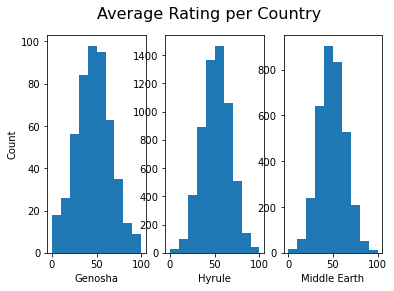

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

f.suptitle(f'Average Rating per Country', fontsize=16)

ax1.hist(data.loc[data['country']=='Genosha', 'avg_rating'])
ax1.set_xlabel('Genosha')
ax1.set_ylabel('Count')

ax2.hist(data.loc[data['country']=='Hyrule', 'avg_rating'])
ax2.set_xlabel('Hyrule')

ax3.hist(data.loc[data['country']=='Middle_Earth', 'avg_rating'])
ax3.set_xlabel('Middle Earth');

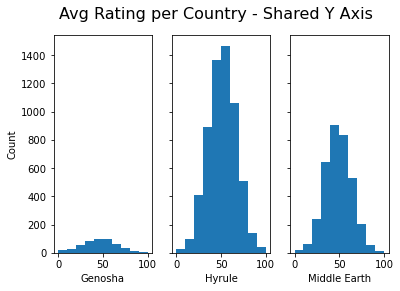

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

f.suptitle(f'Avg Rating per Country - Shared Y Axis', fontsize=16)

ax1.hist(data.loc[data['country']=='Genosha', 'avg_rating'])
ax1.set_xlabel('Genosha')
ax1.set_ylabel('Count')

ax2.hist(data.loc[data['country']=='Hyrule', 'avg_rating'])
ax2.set_xlabel('Hyrule')

ax3.hist(data.loc[data['country']=='Middle_Earth', 'avg_rating'])
ax3.set_xlabel('Middle Earth');

**Interesting how all the ratings are normally distributed per country.**

#### Ticket Price per Genre

In [6]:
def ticket_price_genre_per_country(country):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
    
    f.suptitle(f'Ticket Price Per Genre - {country}', fontsize=16)
    f.text(0.5, 0.02, 'Price', fontsize=12)
    
    ax1.hist(data.loc[(data.genre == 'SwordSmithing') & (data.country == country), 'ticket_price'], color='Orange')
    ax1.set_title('SwordSmithing')
    ax1.set_ylabel('Count', fontsize=12)

    ax2.hist(data.loc[(data.genre == 'Spells') & (data.country == country), 'ticket_price'], color='Orange')
    ax2.set_title('Spells')

    ax3.hist(data.loc[(data.genre == 'Mutations') & (data.country == country), 'ticket_price'], color='Orange')
    ax3.set_title('Mutations')

    ax4.hist(data.loc[(data.genre == 'Potion_Making') & (data.country == country), 'ticket_price'], color='Orange')
    ax4.set_title('Potion_Making');
    
    return

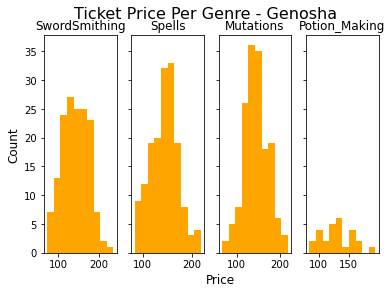

In [7]:
ticket_price_genre_per_country('Genosha')

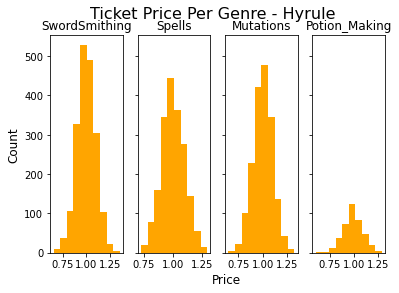

In [8]:
ticket_price_genre_per_country('Hyrule')

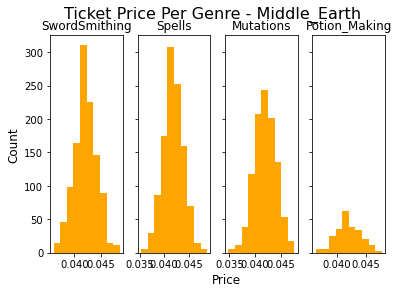

In [9]:
ticket_price_genre_per_country('Middle_Earth')

#### Heatmap

In [10]:
# Creating dummies for each categorical column for use in correlatoin matrix. 
data_dummies = data
data_dummies = pd.get_dummies(data_dummies, columns=['country'], drop_first=False)
data_dummies = pd.get_dummies(data_dummies, columns=['genre'], drop_first=False)
data_dummies.drop(columns=['name'], inplace=True)

In [11]:
# data_no_genosha = data_dummies
# data_no_genosha.drop(columns=['country_Genosha'], inplace=True)

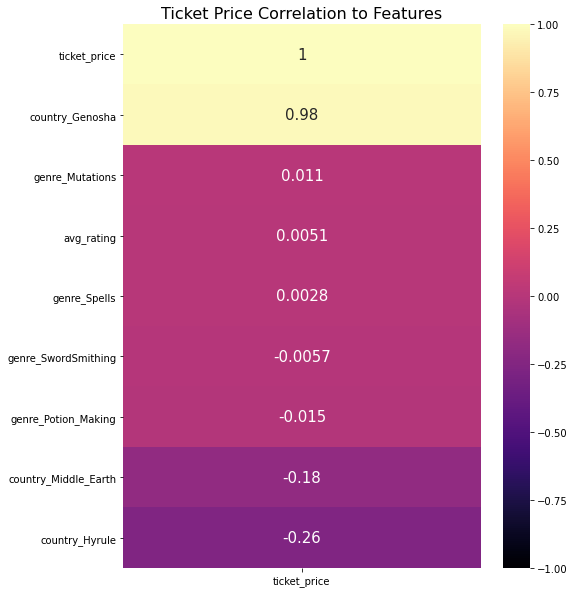

In [12]:
#Ticket Price Correlation Heatmap
plt.figure(figsize=(8, 10))
plt.title('Ticket Price Correlation to Features', fontsize=16)
sns.heatmap(data_dummies.corr()[['ticket_price']].sort_values('ticket_price', ascending=False),
           annot=True,
            cmap='magma',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

**Genosha has high correlation because their currency is larger than the rest. Not significant**

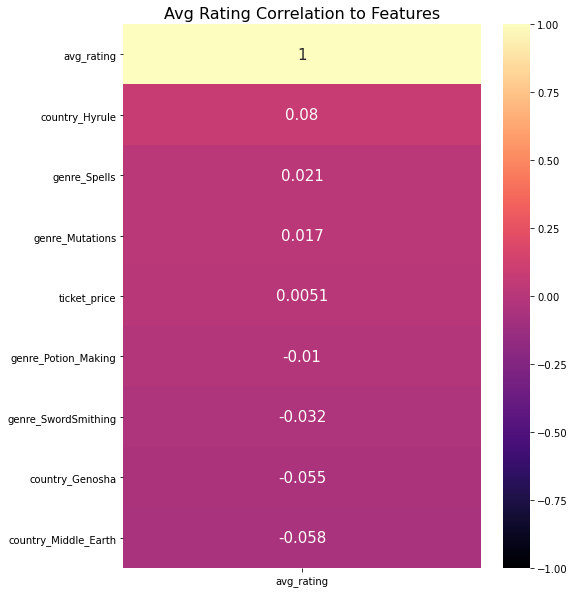

In [13]:
# Average Rating Correlation Heatmap
plt.figure(figsize=(8, 10))
plt.title('Avg Rating Correlation to Features', fontsize=16)
sns.heatmap(data_dummies.corr()[['avg_rating']].sort_values('avg_rating', ascending=False),
           annot=True,
            cmap='magma',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

**No major significant correlation between average rating to other features.**

## Functions for Querying

#### Boxplot Function

In [24]:
def boxplot_country(country, metric):
    temp_df = data.groupby(by='country').get_group(country)
    ax = sns.boxplot(x=temp_df[metric]).set_title(metric)
    return ax

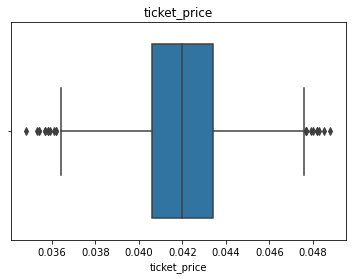

In [25]:
boxplot_country('Middle_Earth', 'ticket_price');

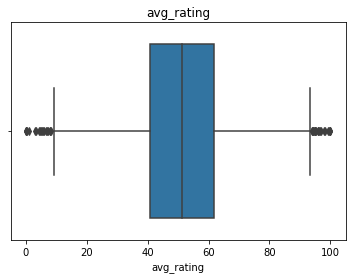

In [26]:
boxplot_country('Hyrule', 'avg_rating');

#### Dataframe for Average Rating Ranges per Country

In [17]:
def country_per_rating_df(rating, operator, country):
    if operator == '>':
        return data.loc[(data.avg_rating > rating)&(data.country == country), :]
    elif operator == '>=':
        return data.loc[(data.avg_rating >= rating)&(data.country == country), :]
    elif operator == '<':
        return data.loc[(data.avg_rating < rating)&(data.country == country), :]
    elif operator == '<=':
        return data.loc[(data.avg_rating <= rating)&(data.country == country), :]
    else:
        return print('Check Operator. Spelling must be '>', '>=', '<', or '<='')

In [18]:
# Dataframe for Genosha movies that have ">=" 50 rating. 
country_per_rating_df(50, '>=', 'Genosha')

,name,country,ticket_price,avg_rating,genre
1,xk8b9MocTE,Genosha,176.2547,62.8047,SwordSmithing
4,ThpLWmUBkv,Genosha,175.4893,62.1337,SwordSmithing
9,HrSU41PPs7,Genosha,166.9742,56.9700,Mutations
10,IQGrNcwfD1,Genosha,173.0252,61.0000,Spells
11,Jo3AOCQT1w,Genosha,176.6632,63.1297,Mutations
...,...,...,...,...,...
491,5Filgaug69,Genosha,157.6355,56.5093,Spells
492,VQt8334ia,Genosha,159.0684,56.8655,SwordSmithing
494,iAebg1Wst,Genosha,155.5371,54.4200,Spells
495,s1xxwolRi,Genosha,157.6664,55.7200,Potion_Making


#### Dataframe for Genre per Country

In [19]:
def groupby_country_genre_df(country_genre):
    if (country_genre == 'Genosha') or (country_genre == 'Hyrule') or (country_genre == 'Middle_Earth'):
        return data.groupby(by='country').get_group(country_genre)
    elif (country_genre == 'SwordSmithing') or (country_genre == 'Spells') or (country_genre == 'Mutations') or (country_genre == 'Potion_Making'):
        return data.groupby(by='genre').get_group(country_genre)
    else:
        return print('Check Spelling')

In [20]:
groupby_country_genre_df('Hyrule')

,name,country,ticket_price,avg_rating,genre
498,d19rpnckGv,Hyrule,1.0935,62.0000,SwordSmithing
499,KaWRtnToJC,Hyrule,0.7481,28.0000,SwordSmithing
500,sBRX9lLull,Hyrule,0.9455,57.3400,Spells
501,O7B9AjXpFt,Hyrule,0.9657,48.6407,SwordSmithing
502,1HpLXjq9Dz,Hyrule,0.9404,42.5596,SwordSmithing
...,...,...,...,...,...
6496,VKYFLLMCa,Hyrule,0.9951,42.6700,Mutations
6497,BXud2exyC,Hyrule,0.9163,46.1300,Spells
6498,Z1qfZ5oWC,Hyrule,1.0227,44.0000,Potion_Making
6499,f24B8j0ss,Hyrule,0.9642,69.5299,SwordSmithing
